### 2021 Spring "EE479: Scientific Computing & Data"
#### Yong-Hoon Kim, KAIST Electrical Engineering
#### Kutz 8.4 Comparison of Solution Techniques for Ax = b: Rules of Thumb
##### Writer: Yumin Song

###### 2021. 05. 16 revised                                                             

#### Fast Fourier transform: FFT, IFFT, FFTSHIFT, IFFTSHIFT

The fast Fourier transform will be discussed. Its implementation is straightforward. 
In python fft is found with command fft(x) using scipy.fft.
The algorithm associated with the FFT does three major things: if shifts the data so that $ x \in [0,L] $ $ \rightarrow  x \in [-L,0] $ and $ x \in [-L,0] $ $ \rightarrow  x \in [0,L] $, Additionally it multiplies every other mode by -1, and it assumes you are working on a $ 2\pi $ periodic domain. 
  The practical implementation of the FFT is transform of a Gaussian function. The transform can be caculated analytically so that we have the exact relations:
  
  $$ f(x) = exp(-\alpha x^{2})  \rightarrow \widehat{f(k)} = \frac{1}{\sqrt{2\alpha}}exp(-\frac{k^{2}}{4\alpha}) $$
  
The code implementation is as follows:

C:\Users\song\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 15.0)

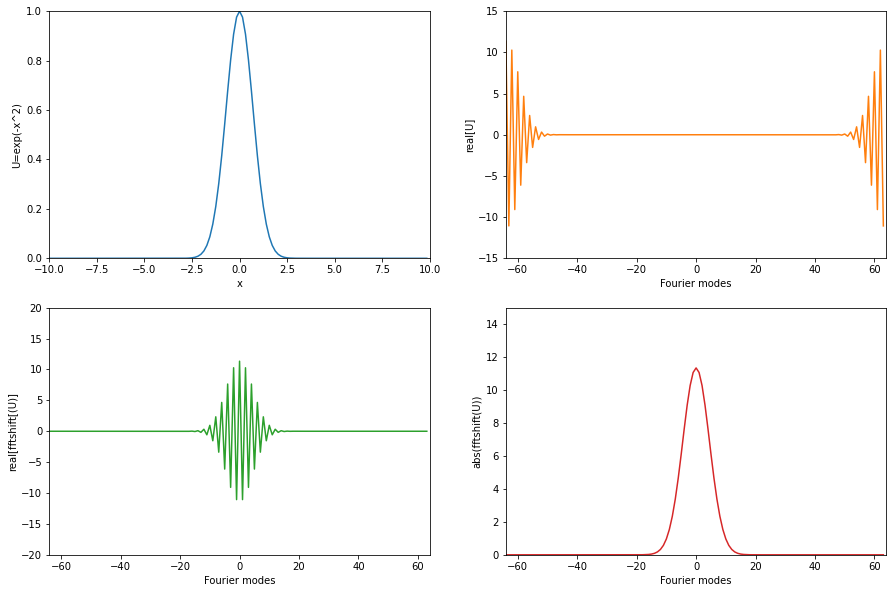

In [1]:
import numpy as np
from  scipy.fft import fft 
import matplotlib.pyplot as plt

L=20 
n = 128

x2 =  np.linspace(-L/2,L/2,n+1)
x=x2[0:n]
k2=np.linspace(-n/2,n/2,n+1)
k=k2[0:n]
u =np.exp(-x*x)
ut =fft(u)
utshift = np.fft.fftshift(ut)

fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(15)

axs[0, 0].plot(x, u)
axs[0, 0].set_xlim([-10,10])
axs[0, 0].set_ylim([0,1])
axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("U=exp(-x^2)")
axs[0, 1].plot(k, ut, 'tab:orange')
axs[0, 1].set_xlim([-64,64])
axs[0, 1].set_ylim([-15,15])
axs[0, 1].set_xlabel("Fourier modes")
axs[0, 1].set_ylabel("real[U]")
axs[1, 0].plot(k, utshift.real, 'tab:green')
axs[1, 0].set_xlabel("Fourier modes")
axs[1, 0].set_ylabel("real[fftshift[(U)]")
axs[1, 0].set_xlim([-64,64])
axs[1, 0].set_ylim([-20,20])
axs[1, 1].plot(k, abs(utshift), 'tab:red')
axs[1, 1].set_xlabel("Fourier modes")
axs[1, 1].set_ylabel("abs(fftshift(U))")
axs[1, 1].set_xlim([-64,64])
axs[1, 1].set_ylim([0,15])

The normal fft result is orange signal. The second figure shows how the pulse is shifted. By using the commanf fft.shift, we can shift the tranformed function back to its mathmatically correct positions as shown  in the third figure.

To take derivative, we need to calculate the k value associated with the transformation. The calculation of the k values need to shift and rexcale to the $2\pi$ domain. The following example differentiates the function $ f(x) = sech(x)$. This example condition is periodic boundary condition and the correct $k$ values. So, no shifting was necessary since we constructed the $k$ value in the sighted space

C:\Users\song\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


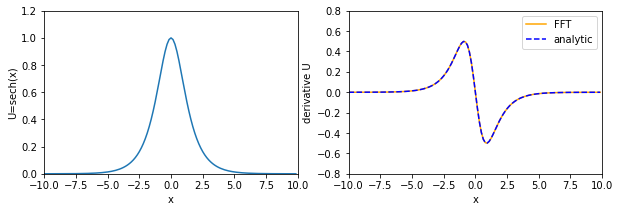

In [49]:
import numpy as np
from  scipy.fft import fft , ifft 
import matplotlib.pyplot as plt
from scipy.stats import hypsecant

L=20 
n = 128

x2 =  np.linspace(-L/2,L/2,n+1)
x=x2[0:n]

u = 1/np.cosh(x)
ut =fft(u)
utshift = np.fft.fftshift(ut)
k = np.zeros(128)
for i in range(64):
    k[i] = i
for i in range(64):
    k[i+64] = -64 +i
k = 2*np.pi/L*k
#k2=2*np.pi/L*[0:((n/2)-1) (-n/2):-1]
np.linspace(-n/2,n/2,n+1)
#k=k2[0:n]

ut1= 1j*k*ut  # first derivative
ut2= -k*k*ut  # second derivative
ut3 = -1j*k*k*k*ut  #third derivative
u1 = ifft(ut1)  
u2 = ifft(ut2)
u3 = ifft(ut3)
u1exact = -  1/np.cosh(x) * np.tanh(x)

f =  plt.figure(figsize=(10,3))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.plot(x,u)
ax1.set_xlim([-10,10])
ax1.set_ylim([0,1.2])
ax1.set_xlabel("x")
ax1.set_ylabel("U=sech(x)")
ax2.plot(x,u1,'orange',label='FFT')
ax2.plot(x,u1exact,'b--',label='analytic')
ax2.set_xlim([-10,10])
ax2.set_ylim([-0.8,0.8])
ax2.set_xlabel("x")
ax2.set_ylabel("derivative U")
ax2.legend()

 We can compare derivative FFT result and analytic result. The first derivative is $ f'(x) = -sech(x)tanh(x).$
 To calculate derivative FFT, we use following equation.

$$df(x)/dx = FFT^{-1}(ik\widehat{f(x)})  $$ 

And we can find two result is same.

##### Sparse matrices

Under discretization, most physical problems yield sparse matrices which is largely composed of zeros. The  sp.sparse.spdiags command allows for construction of sparse matrices. The sparse matrix is them saved using a minimal amount of memory and all matrix opeartions are conducted as usual. 

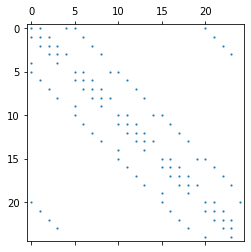

In [52]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import scipy.sparse as sps

m=5
n=m*m
e0 = np.zeros((n,1))
e1 = np.ones((n,1))
e2=e1
e4=e0

for j in range (m):
    e2[m*j-1] = 0
    e4[m*j-1] = 1
e3 = np.zeros((n,1))
e3[1:n-1] = e2[0:n-2]
e3[0] = e2[n-1]
e5 = np.zeros((n,1))
e5[1:n-1] = e4[0:n-2]
e5[0] = e4[n-1]


sp_in1 = np.zeros((n,9))
for i in range(n):
    sp_in1[i,0] = e1[i]
    sp_in1[i,1] = e1[i]
    sp_in1[i,2] = e5[i]
    sp_in1[i,3] = e2[i]
    sp_in1[i,4] = -4*e1[i]
    sp_in1[i,5] = e3[i]
    sp_in1[i,6] = e4[i]
    sp_in1[i,7] = e1[i]
    sp_in1[i,8] = e1[i]

sp_in2 = np.zeros((9))
sp_in2[0] = -(n-m)
sp_in2[1] = -(m)
sp_in2[2] = -(m)+1
sp_in2[3] = -1
sp_in2[4] = 0
sp_in2[5] = 1
sp_in2[6] = m-1
sp_in2[7] = m
sp_in2[8] = n-m

matA = sp.sparse.spdiags(sp_in1.transpose(),sp_in2,n,n)
M = sps.csr_matrix(matA)
plt.spy(M,markersize=1)
plt.show()

The spy command allows you to look at the nonzero compoents of the matrix structure. we can find the laplcian operator using second-order discretization is sparse matrix.

##### Iterative methods: BICGSTAB, GMRES

In this section, we show twoof the more promising methods: the bi-conjugate stabilized gradient methid(bichstab) and the generalized minimum residual method(gmres)
Both are using scipy.spare.linalg module.
Recall that these iteration methods are for solving the linear system $Ax=b$ 

The example is same as 8.1

The genealized minimal residual method is an iterative method for the numerical solution of a nonsymmetric system of linear equation. The method approximates the solution by the vector in a Krylov subspace with minimal residual. 

The basic call to the generalized minimum residual method is 

V = linag.gmres(A,b,x0,tol=1e-05)
 
The code usage is as follows.

Size of A matrix = 2500


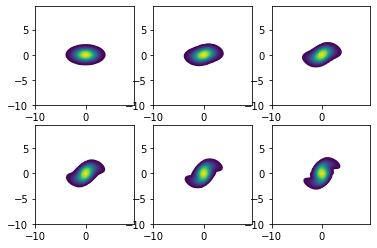

In [69]:
import numpy as np
import scipy.sparse.linalg as linag
import time
import matplotlib.pyplot as plt

N=2500
########################################### A Matrix construct 
I2 = -4*np.eye(N)
E = np.diag(np.ones((N-1)), k=1)
E2 = np.diag( np.ones(int(np.sqrt(N))), N-int(np.sqrt(N))  )
E3 = np.diag( np.ones(N-int(np.sqrt(N))), int(np.sqrt(N))  )
A = I2 + E + E.T +E2 + E2.T + E3 + E3.T
for i in range(int(np.sqrt(N))):
    A[(i+1)*int(np.sqrt(N))-1,int(np.sqrt(N))*i] = 1
    A[int(np.sqrt(N))*i,(i+1)*int(np.sqrt(N))-1] = 1
    A[int(np.sqrt(N))*i,int(np.sqrt(N))*i-1] = 0
    A[int(np.sqrt(N))*i-1,int(np.sqrt(N))*i] = 0
################################# 8.5 Overcoming Computational difficulties
#A[0,0] = 0 
###################################### Gradient matrix construct #####
for i in range(int(np.sqrt(N))):
    A[(i+1)*int(np.sqrt(N))-1,int(np.sqrt(N))*i] = 1
    A[int(np.sqrt(N))*i,(i+1)*int(np.sqrt(N))-1] = 1
    A[int(np.sqrt(N))*i,int(np.sqrt(N))*i-1] = 0
    A[int(np.sqrt(N))*i-1,int(np.sqrt(N))*i] = 0

A_gx1 =  np.diag(np.ones((N-1)), k=1)
A_gx =  A_gx1 - A_gx1.T
for i in range(int(np.sqrt(N))):  
    A_gx[ int(np.sqrt(N))*(i) , int(np.sqrt(N))*i-1] = 0
    A_gx[ int(np.sqrt(N))*i, int(np.sqrt(N))*(i+1)-1] = -1
    A_gx[ int(np.sqrt(N))*i-1,  int(np.sqrt(N))*(i) ] = 0
    A_gx[ int(np.sqrt(N))*(i+1)-1, int(np.sqrt(N))*i] = 1
    
A_gy1 =   np.diag(np.ones((N-int(np.sqrt(N)))), int(np.sqrt(N)))
A_gy2 =  -np.diag(np.ones((int(np.sqrt(N)))), N-int(np.sqrt(N)))
A_gy3 =  -np.diag(np.ones((N-int(np.sqrt(N)))), int(np.sqrt(N))).T
A_gy4 =   np.diag(np.ones((int(np.sqrt(N)))), N-int(np.sqrt(N))).T
A_gy = A_gy1 + A_gy2 + A_gy3 + A_gy4
##################################################################

x2 = np.linspace(-10,10,int(np.sqrt(N))+1)
y2 = np.linspace(-10,10,int(np.sqrt(N))+1)
#x2 = np.linspace(0,4,int(np.sqrt(N)+1))
#y2 = np.linspace(0,4,int(np.sqrt(N)+1))
x=x2[0:len(x2)-1];
y=y2[0:len(y2)-1];
[X,Y]=np.meshgrid(x,y);
b = 1*np.exp(-0.25*X**2-Y**2);
#b= b.reshape(N,1)
test_b = np.zeros((int(np.sqrt(N)),int(np.sqrt(N))))
test_b[:,:] = np.sum(b) / int(np.sqrt(N)) / int(np.sqrt(N))
b = b - test_b
w= b.reshape(N,1)
#print('test_2b sum=',np.sum(b))
h = x[1]-x[0]
#print('h=',h)
A = A / h / h
A_gx = A_gx / (2*h)
A_gy = A_gy / (2*h)

print('Size of A matrix =', len(A))

def conjGrad(A,x,b,tol,N): #input: A(matrix) x(initial),tol(tolerence),N(matrix size)
    r = b - A.dot(x)
    p = r.copy()
    for i in range(N):
        Ap = A.dot(p)
        alpha = np.dot(p.T,r)/np.dot(p.T,Ap)
        x = x + alpha*p
        r = b - A.dot(x)
      #  print('np.sqrt(np.sum((r**2)))', np.sqrt(np.sum((r**2))))
        if np.sqrt(np.sum((r**2))) < tol:
            print('Conjugate gradient Itr:', i)
            break
        else:
            beta = -np.dot(r.T,Ap)/np.dot(p.T,Ap)
            p = r + beta*p
    return x 

x0 = np.zeros((N,1)) # initial guess
nu=0.001
wt2 = w
wt2 = wt2.reshape(N,order='F')

def spc_rhs_gmres(t,wt2):
    wt2 = wt2.reshape(N,1,order='F')
    V = linag.gmres(A,wt2,x0,tol=1e-05)
    psi = V[0]
    psi = psi.reshape(N,1)
    wt2 = A_gy.dot(psi) * A_gx.dot(wt2)   -  A_gx.dot(psi) * A_gy.dot(wt2) + nu*A.dot(wt2)
    wt2 = wt2.reshape(N,order='F')
    rhs = wt2
    return rhs

from scipy.integrate import solve_ivp

sol = solve_ivp (spc_rhs_gmres,[0,10], wt2, t_eval=[0, 2, 4, 6, 8,10] )

T = sol.t
F = sol.y
tspan = np.linspace(0,10,6)
levels = np.linspace(0.01,1,100)
for j in range(len(tspan)):
    plt.subplot(2,3,j+1)
    wf = (F[:,j].reshape(int(np.sqrt(N)),int(np.sqrt(N)))).real
    CS = plt.contour(X, Y, wf, levels)   # set levels automatically
   # plt.colorbar()

And, the biconjugate gradient stabilized method, often abbreviated as BiCGSTAB, is an iterative method for the numerical solution of nonsymmetric linear systems. It is a variant of the biconjugate gradient method (BiCG) and has faster and smoother convergence than the original BiCG

Likewise, the bi-conjugate stabilized gradient mehod is called by 

V = linag.bicgstab(A,b,x0,tol=1e-05)

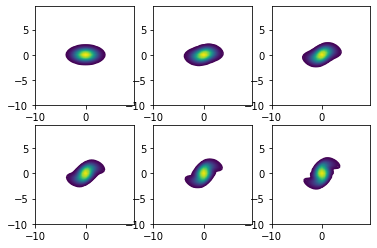

In [68]:
def spc_rhs_bicgstab(t,wt2):
    wt2 = wt2.reshape(N,1,order='F')
    V = linag.bicgstab(A,wt2,x0,tol=1e-05)
    psi = V[0]
    psi = psi.reshape(N,1)
    wt2 = A_gy.dot(psi) * A_gx.dot(wt2)   -  A_gx.dot(psi) * A_gy.dot(wt2) + nu*A.dot(wt2)
    wt2 = wt2.reshape(N,order='F')
    rhs = wt2
    return rhs

from scipy.integrate import solve_ivp

sol = solve_ivp (spc_rhs_bicgstab,[0,10], wt2, t_eval=[0, 2, 4, 6, 8,10] )

T = sol.t
F = sol.y
tspan = np.linspace(0,10,6)
levels = np.linspace(0.01,1,100)
for j in range(len(tspan)):
    plt.subplot(2,3,j+1)
    wf = (F[:,j].reshape(int(np.sqrt(N)),int(np.sqrt(N)))).real
    CS = plt.contour(X, Y, wf, levels)   # set levels automatically
   # plt.colorbar()

In [ ]:
And, we can see the two results is same. 